In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import plot_func as f

In [3]:
ds = xr.open_dataset('gridfile_test.nc')
ds2 = xr.open_dataset('erai_regrid_5x5.nc')
obs = xr.open_dataset('../GPS-RO__CP_LR_5x5_2007-2018.nc')

In [4]:
ds_slice = ds.sel(lat=slice(-20,20))
obs_slice = obs.sel(lat = slice(-20,20))
ds2_slice = ds2.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

In [5]:
obs_mon = obs_slice.resample(time='M').mean()

In [6]:
obs_group = obs_mon.groupby('time.month').mean(dim='time')
era5_mon = ds_slice.groupby('time.month').mean(dim='time')

In [7]:
era5_nov15=ds_slice.ctpt.sel(time=slice('2015-11-30','2015-12-30'))
era5_nov08=ds_slice.ctpt.sel(time=slice('2007-11-30', '2007-12-30'))
obs_nov15 = obs_mon.CP_T.sel(time=slice('2015-12-01', '2015-12-31'))

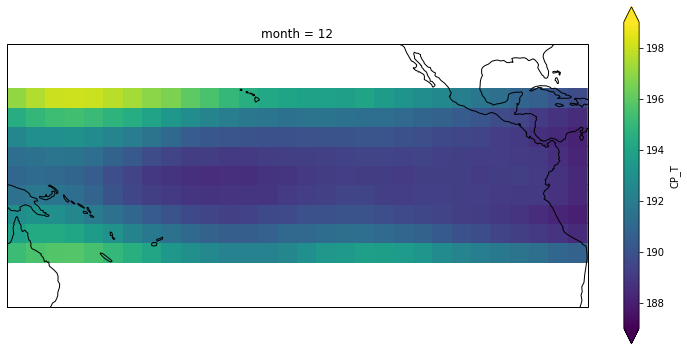

In [8]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
#Mercator(central_longitude=180, min_latitude=-30, max_latitude=30))
#ax.background_img(name='BM', resolution='high')

ax.set_extent([-70,140,-10,10])

ax.coastlines()
obs_group.CP_T[11,:,:].plot(ax=ax, vmax=199, vmin=187)

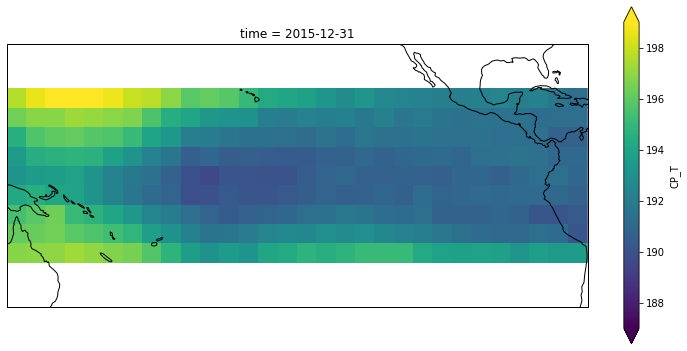

In [9]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
#Mercator(central_longitude=180, min_latitude=-30, max_latitude=30))
#ax.background_img(name='BM', resolution='high')

ax.set_extent([-70,140,-10,10])

ax.coastlines()
obs_nov15.plot(ax=ax, vmax=199, vmin=187)

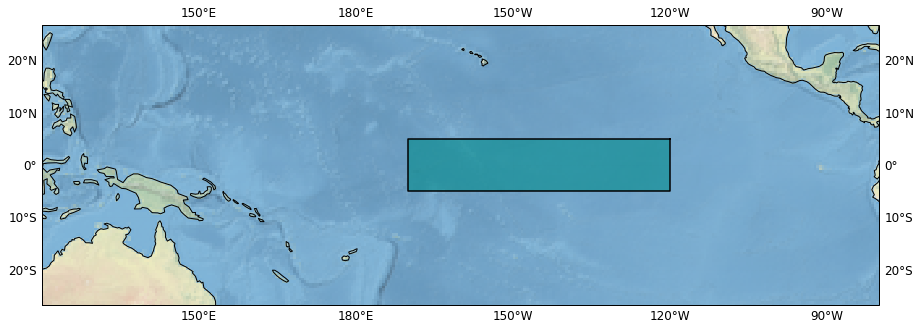

In [99]:
plt.figure(figsize=(15,6.2)) 
import shapely.geometry as sgeom
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([-80,120,-5,5])
ax.coastlines()
ax.stock_img()
box = sgeom.box(minx=-170, maxx=-120, miny=-5, maxy=5)

plt.plot([-120, -170, -170, -120, -120],[5, 5, -5, -5, 5],'k',transform=ccrs.PlateCarree(central_longitude=0))
ax.add_geometries([box], crs=ccrs.PlateCarree(central_longitude=0), facecolor='darkcyan',
                  alpha=0.6)
xticks = [150,180,-150, -120,-90] #, 0, 60, 120, 170]
yticks = [-20, -10, 0, 10, 20]
gl = ax.gridlines(xlocs=xticks, ylocs=yticks, draw_labels=True, alpha=0.01, color='gray', linestyle='--')
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#plt.savefig('ONI_area_map_cool_N-S.png')

In [124]:
diff = era5_nov15[:,:,:].mean(axis=0) - obs_nov15[:,:,:].mean(axis=0)
diff2 = era5_nov15[:,:,:].mean(axis=0) - era5_mon.ctpt[10,:,:]

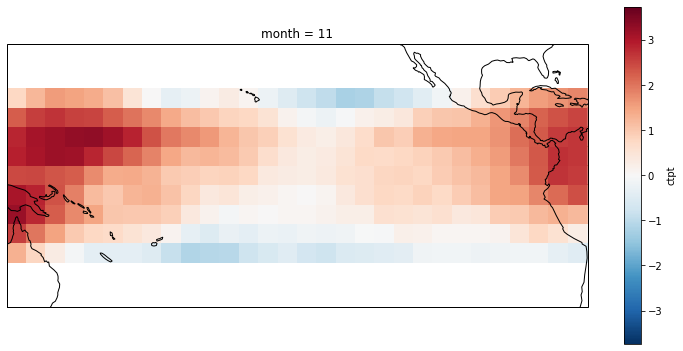

In [125]:
plt.figure(figsize=(13,6.2)) 
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([-70,140,-10,10])
ax.coastlines()
diff2.plot()